In [79]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
file_path = 'C:/My documents/names'

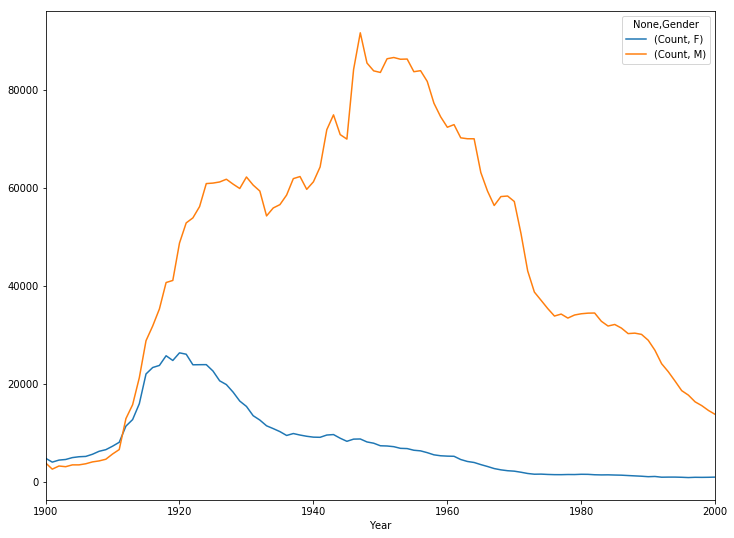

In [117]:
# Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
years = []
y = 1900
while y < 2001:
    df_names = pd.read_csv(
        f'{file_path}/yob{y}.txt',
        names=['Name', 'Gender', 'Count'])
    df_names['Year'] = y
    new = df_names['Name'].isin(['Ruth', 'Robert'])
    years.append(df_names[new])
    y += 1
#     print(years)
name_by_years = pd.concat(years)
result = name_by_years.groupby(['Year', 'Gender']).sum()
# print(result)
result.unstack('Gender').plot()

In [125]:
# Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
gender_dynamics = name_by_years.groupby(['Year', 'Gender']).sum()
# for year in range(1900, 2005, 5):
gender_dynamics = gender_dynamics.loc[(gender_dynamics.index.get_level_values(0).isin(range(1900, 2005, 5)))]
gender_dynamics

Count
Year Gender       
1900 F        4789
     M        3837
1905 F        5089
     M        3430
1910 F        7241
     M        5644
1915 F       21994
     M       28784
1920 F       26307
     M       48730
1925 F       22598
     M       60974
1930 F       15365
     M       62219
1935 F       10220
     M       56576
1940 F        9091
     M       61232
1945 F        8242
     M       69956
1950 F        7331
     M       83569
1955 F        6417
     M       83720
1960 F        5215
     M       72377
1965 F        3485
     M       63135
1970 F        2144
     M       57214
1975 F        1474
     M       35340
1980 F        1508
     M       34288
1985 F        1354
     M       32099
1990 F        1015
     M       28881
1995 F         896
     M       18589
2000 F         930
     M       13738

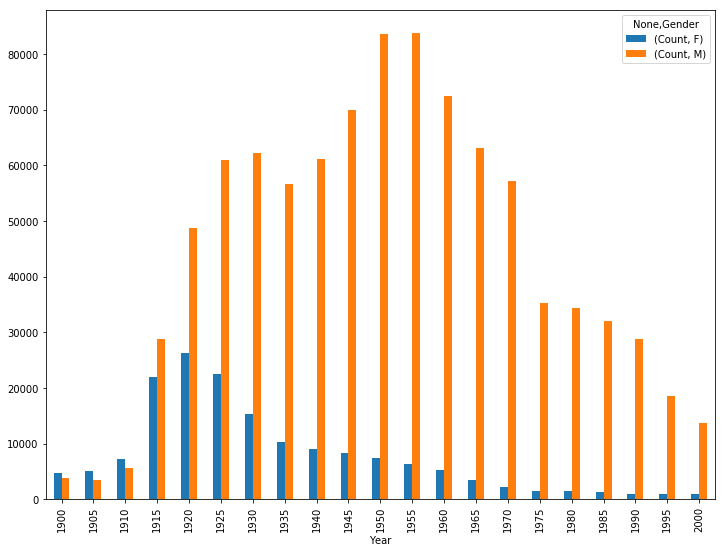

In [126]:
gender_dynamics.unstack().plot(kind='bar')

         Count
Name          
Robert   83762
Richard  51096
Ronald   29982
Roger    12576
Raymond  11218


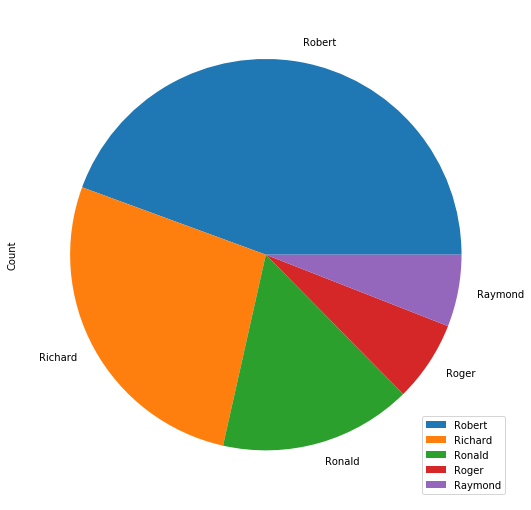

In [152]:
# Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
y = 1950
list_names = []
df_names = pd.read_csv(
    f'{file_path}/yob{y}.txt',
    names=['Name', 'Gender', 'Count'])
for name in df_names['Name']:
    if name[0] == 'R':
        list_names.append(name)
new = df_names['Name'].isin(list_names)
result = df_names[new]
name_dynamics = result.groupby(['Name']).sum().sort_values(by='Count', ascending=False).head(5)
# print(name_dynamics)
name_dynamics.plot(kind='pie', y='Count')